In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
# 로지스틱 회귀모델
from statsmodels.api import Logit
# 평가 함수
from sklearn.metrics import accuracy_score
# 혼동 행렬
from sklearn.metrics import confusion_matrix
# 분류 성능 리포트
from sklearn.metrics import classification_report

In [5]:
df_raw = pd.read_csv('data/bank.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
# 결측치 확인

df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
# 결측치 처리

# job 은 other(기타)로, 나머지는 변수의 평균값으로 대체
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

C:\Users\User\AppData\Local\Temp/ipykernel_9036/490492403.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(), inplace = True)


In [8]:
df_raw.isnull().sum(axis = 0)

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [9]:
# 데이터 분할
df_train, df_test = train_test_split(df_raw, test_size= 0.3, random_state=1234)
print('학습용 데이터 크기: {}'.format(df_train.shape))
print('평가용 데이터 크기: {}'.format(df_test.shape))

학습용 데이터 크기: (2623, 13)
평가용 데이터 크기: (1125, 13)


In [19]:
# 모델 및 회귀계수 검토

# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

# 모델 적용
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2257
Time:                        16:51:26   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [20]:
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2257
Time:                        16:51:51   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 3.476e-68
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.0970      0.556     -9.160      0.000      -6.188      -4.006
C(JOB)[T

In [21]:
log_model = Logit.from_formula("BAD ~ LOAN + MORTDUE + VALUE + C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237655
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2608
Method:                           MLE   Df Model:                           14
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2255
Time:                        16:52:22   Log-Likelihood:                -623.37
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 7.421e-69
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1408      0.549     -9.364      0.000      -6.217      -4.065
C(JOB)[T

In [16]:
log_model = Logit.from_formula("BAD ~ LOAN + VALUE + C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237713
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2609
Method:                           MLE   Df Model:                           13
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2254
Time:                        16:50:04   Log-Likelihood:                -623.52
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.589e-69
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.1303      0.549     -9.337      0.000      -6.207      -4.053
JOB[T.Office]    

In [22]:
log_model = Logit.from_formula("BAD ~ LOAN + C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237870
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2610
Method:                           MLE   Df Model:                           12
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2248
Time:                        16:52:57   Log-Likelihood:                -623.93
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 4.215e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.0446      0.542     -9.314      0.000      -6.106      -3.983
C(JOB)[T

In [23]:
log_model = Logit.from_formula("BAD ~ C(JOB) + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC", df_train)

log_result = log_model.fit()

print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.238224
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2611
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2237
Time:                        16:53:27   Log-Likelihood:                -624.86
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.774e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -5.1652      0.534     -9.664      0.000      -6.213      -4.118
C(JOB)[T

In [29]:
# 예측 및 성능 평가

# 학습용 데이터 예측
y_pred = log_result.predict(df_train)
# 0과 1의 값을 가진 클래스로 변환
# 0.5를 기준으로 0.5 이상이면 1, 아니면 0
y_pred_class = (y_pred > 0.5).astype(int)
print('학습용 데이터 정확도: {:.3}'.format(accuracy_score(df_train['BAD'], y_pred_class)))
#평가용 데이터 예측
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
print('평가용 데이터 정확도: {:.3}'.format(accuracy_score(df_test['BAD'], y_pred_class)))

학습용 데이터 정확도: 0.921
평가용 데이터 정확도: 0.924


In [30]:
# 혼동행렬
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test['BAD'], y_pred_class)))

Confusion Matrix : 
[[1016    5]
 [  81   23]]


In [31]:
# 평가
print('Classification Report: \n', classification_report(df_test['BAD'], y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1021
           1       0.82      0.22      0.35       104

    accuracy                           0.92      1125
   macro avg       0.87      0.61      0.65      1125
weighted avg       0.92      0.92      0.90      1125



In [ ]:
# 설명변수 중요도

df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh( y = 'Coef')

## 실습해보기

In [32]:
df_tel = pd.read_csv('data/tele_customer.csv')
df_tel.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [33]:
df_tel.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [34]:
df_tel.shape

(930, 15)

# 목표변수 이진화

In [36]:
df_tel['CHURN'].unique()

array(['Active', 'Churned'], dtype=object)

In [38]:
df_tel['CHURN'].replace({'Active': 0, 'Churned': 1}, inplace = True)

In [39]:
df_tel.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


# 불필요한 column drop

In [40]:
df_tel.drop(columns = 'CUSTOMER_ID', inplace = True)

In [41]:
df_tel.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


# 데이터 분할

In [48]:
df_tel.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [49]:
# 데이터 분할
df_train, df_test = train_test_split(df_tel, test_size= 0.2, random_state=1234)
print('학습용 데이터 크기: {}'.format(df_train.shape))
print('평가용 데이터 크기: {}'.format(df_test.shape))

학습용 데이터 크기: (744, 14)
평가용 데이터 크기: (186, 14)


# 로지스틱 회귀분석

In [52]:
# 모델 및 회귀계수 검토

# from_formula 함수를 이용하여 변수 역할 지정
log_model = Logit.from_formula('''CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)

# 모델 적용
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

         Current function value: 0.244441
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      714
Method:                           MLE   Df Model:                           29
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.5082
Time:                        17:19:59   Log-Likelihood:                -181.86
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 5.652e-62
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -25.3097   5616.636     -0.005      0.996    -1.1e+04     1.1e+04
C(GENDER)[T.M]   

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
log_model = Logit.from_formula('''CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME 
+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431065
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      724
Method:                           MLE   Df Model:                           19
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1327
Time:                        17:21:09   Log-Likelihood:                -320.71
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 1.154e-12
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.2930      1.458     -2.945      0.003      -7.150      -1.436
C(GENDER)[T.M]   

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
log_model = Logit.from_formula('''CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME 
+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431072
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      725
Method:                           MLE   Df Model:                           18
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1327
Time:                        17:22:56   Log-Likelihood:                -320.72
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 4.836e-13
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.3021      1.456     -2.955      0.003      -7.156      -1.448
C(GENDER)[T.M]   

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
log_model = Logit.from_formula('''CHURN ~ AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME 
+ TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431132
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      726
Method:                           MLE   Df Model:                           17
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1326
Time:                        17:23:12   Log-Likelihood:                -320.76
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 2.036e-13
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.3112      1.456     -2.960      0.003      -7.166      -1.457
C(CHARGE_TYPE)[T.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
log_model = Logit.from_formula('''CHURN ~ AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431249
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      727
Method:                           MLE   Df Model:                           16
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1323
Time:                        17:23:36   Log-Likelihood:                -320.85
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 8.628e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.2639      1.450     -2.941      0.003      -7.106      -1.422
C(CHARGE_TYPE)[T.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [58]:
log_model = Logit.from_formula('''CHURN ~ AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431306
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      728
Method:                           MLE   Df Model:                           15
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1322
Time:                        17:23:56   Log-Likelihood:                -320.89
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 3.407e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.3156      1.438     -3.000      0.003      -7.135      -1.496
C(CHARGE_TYPE)[T.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
log_model = Logit.from_formula('''CHURN ~ AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + PEAK_CALLS_TIME + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.431662
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      729
Method:                           MLE   Df Model:                           14
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1315
Time:                        17:24:17   Log-Likelihood:                -321.16
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 1.581e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.3389      1.435     -3.023      0.003      -7.152      -1.525
C(CHARGE_TYPE)[T.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
log_model = Logit.from_formula('''CHURN ~ AGE + C(CHARGE_TYPE) + C(USAGE_BAND) + SERVICE_DURATION + 
DROPPED_CALLS + TOTAL_CALLS_TIME''', df_train)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.432914
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  744
Model:                          Logit   Df Residuals:                      730
Method:                           MLE   Df Model:                           13
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1290
Time:                        17:24:31   Log-Likelihood:                -322.09
converged:                      False   LL-Null:                       -369.79
Covariance Type:            nonrobust   LLR p-value:                 1.282e-14
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.2880      1.430     -2.999      0.003      -7.090      -1.486
C(CHARGE_TYPE)[T.

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- AGE, C(CHARGE_TYPE), C(USAGE_BAND), SERVICE_DURATION, DROPPED_CALLS, TOTAL_CALLS_TIME

# 예측 및 성능 평가

In [85]:
# 학습용 데이터 예측
y_pred = log_result.predict(df_train)

# 0과 1의 값을 가진 클래스로 변환
# 0.5를 기준으로 0.5 이상이면 1, 아니면 0
y_pred_class = (y_pred > 0.1).astype(int)
print('학습용 데이터 정확도: {:.3}'.format(accuracy_score(df_train['CHURN'], y_pred_class)))

#평가용 데이터 예측
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.1).astype(int)
print('평가용 데이터 정확도: {:.3}'.format(accuracy_score(df_test['CHURN'], y_pred_class)))

학습용 데이터 정확도: 0.418
평가용 데이터 정확도: 0.371


# 혼동행렬

In [86]:
# 혼동행렬
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test['CHURN'], y_pred_class)))

Confusion Matrix : 
[[ 40 113]
 [  4  29]]


In [87]:
# 평가
print('Classification Report: \n\n', classification_report(df_test['CHURN'], y_pred_class))

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.26      0.41       153
           1       0.20      0.88      0.33        33

    accuracy                           0.37       186
   macro avg       0.56      0.57      0.37       186
weighted avg       0.78      0.37      0.39       186



<AxesSubplot:>

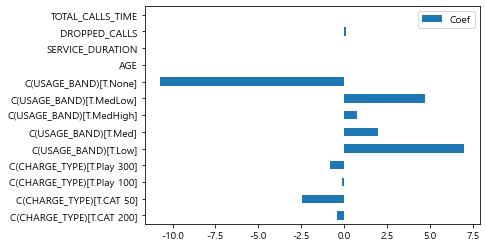

In [81]:
# 설명변수 중요도

df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh( y = 'Coef')